# 데이터에 관하여

In [1]:
# Pandas를 pd라는 이름으로 임포트한다
import pandas as pd
import numpy as np

In [2]:
df_test = pd.read_csv('../data/ch1_sport_test.csv')
df_test

,학생번호,학년,악력,윗몸일으키기,점수,순위
0,1,1,40.2,34,15,4
1,2,1,34.2,14,7,10
2,3,1,28.8,27,11,7
3,4,2,39.0,27,14,5
4,5,2,50.9,32,17,2
5,6,2,36.5,20,9,9
6,7,3,36.6,31,13,6
7,8,3,49.2,37,18,1
8,9,3,26.0,28,10,8
9,10,3,47.4,32,16,3


In [3]:
# 학생번호를 인덱스로 csv 파일을 읽어들여, 변수 df에 저장
df = pd.read_csv('../data/ch1_sport_test.csv',
                 index_col='학생번호')
# 변수 df를 표시
df

,학년,악력,윗몸일으키기,점수,순위
학생번호,,,,,
1,1,40.2,34,15,4
2,1,34.2,14,7,10
3,1,28.8,27,11,7
4,2,39.0,27,14,5
5,2,50.9,32,17,2
6,2,36.5,20,9,9
7,3,36.6,31,13,6
8,3,49.2,37,18,1
9,3,26.0,28,10,8


In [4]:
df['악력']

학생번호
1     40.2
2     34.2
3     28.8
4     39.0
5     50.9
6     36.5
7     36.6
8     49.2
9     26.0
10    47.4
Name: 악력, dtype: float64

In [5]:
df.shape

(10, 5)

1) 데이터 세트를 Pandas DataFrame에 로드하고 기본 데이터 탐색을 수행하여 데이터 유형, 고유 등급 수 및 기술 통계 요약을 포함하여 데이터 세트를 요약합니다.head() , info() ,describe() nunique()


2) 데이터세트에 누락된 값이 있는지 확인하세요.

3) 악력, 윗몸일으키기 점수, 순위 간의 Pearson 상관계수를 계산하고 해석합니다. 어떤 체력 테스트가 순위와 더 강한 상관관계가 있는지 확인합니다.


4) 데이터를 등급별로 그룹화하고 등급별 평균 악력과 윗몸 일으키기 점수를 계산합니다. 

5)  각 학년 내 순위 분포를 분석해 보세요. Pandas를 사용하여 빈도표를 만들고 패턴을 설명하세요.


6) 상위 3명의 학생과 하위 3명의 학생의 평균 악력과 윗몸일으키기 점수를 비교합니다.


7) 학생들의 성적과 순위 사이에 관계가 있는지 확인합니다. 상자 그림을 사용하여 다양한 등급에 대한 순위 분포를 시각화합니다. 

In [6]:
data = {
    'Grade': [1, 1, 1, 2, 2, 2, 3, 3, 3, 3],
    'GripStrength': [40.2, 34.2, 28.8, 39.0, 50.9, 36.5, 36.6, 49.2, 26.0, 47.4],
    'SitupScore': [34, 14, 27, 27, 32, 20, 31, 37, 28, 32],
    'Ranking': [4, 10, 7, 5, 2, 9, 6, 1, 8, 3]
}

In [20]:
df2 = pd.DataFrame(data)
df2

,Grade,GripStrength,SitupScore,Ranking
0,1,40.2,34,4
1,1,34.2,14,10
2,1,28.8,27,7
3,2,39.0,27,5
4,2,50.9,32,2
5,2,36.5,20,9
6,3,36.6,31,6
7,3,49.2,37,1
8,3,26.0,28,8
9,3,47.4,32,3


In [8]:
#1
print(df2.info())
print('================')
print(df2.head())
print('================')
print(df2.describe())
print('================')
print(df2['Grade'].nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Grade         10 non-null     int64  
 1   GripStrength  10 non-null     float64
 2   SitupScore    10 non-null     int64  
 3   Ranking       10 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 452.0 bytes
None
   Grade  GripStrength  SitupScore  Ranking
0      1          40.2          34        4
1      1          34.2          14       10
2      1          28.8          27        7
3      2          39.0          27        5
4      2          50.9          32        2
           Grade  GripStrength  SitupScore   Ranking
count  10.000000     10.000000   10.000000  10.00000
mean    2.100000     38.880000   28.200000   5.50000
std     0.875595      8.337306    6.828047   3.02765
min     1.000000     26.000000   14.000000   1.00000
25%     1.250000     34.775000   27.000000   3.25000

In [23]:
#2
df2.isnull().count()

Grade           10
GripStrength    10
SitupScore      10
Ranking         10
dtype: int64

In [10]:
#3
df2.select_dtypes(include=[np.number]).corr()

,Grade,GripStrength,SitupScore,Ranking
Grade,1.000000,0.260575,0.460903,-0.356260
GripStrength,0.260575,1.000000,0.528235,-0.835013
SitupScore,0.460903,0.528235,1.000000,-0.881453
Ranking,-0.356260,-0.835013,-0.881453,1.000000


In [14]:
#4
test4 = df2.groupby('Grade').mean()
test4[['GripStrength','SitupScore']]

#df.groupby('Grade')[['GripStrength','SitupScore']].meam()

,GripStrength,SitupScore
Grade,,
1,34.400000,25.000000
2,42.133333,26.333333
3,39.800000,32.000000


In [46]:
#5
for grade in sorted(df2['Grade'].unique()):
    print(f"학년별 순위 분포 {grade}:")
    print(df2[df2['Grade']==grade]['Ranking'].value_counts().sort_index())

학년별 순위 분포 1:
Ranking
4     1
7     1
10    1
Name: count, dtype: int64
학년별 순위 분포 2:
Ranking
2    1
5    1
9    1
Name: count, dtype: int64
학년별 순위 분포 3:
Ranking
1    1
3    1
6    1
8    1
Name: count, dtype: int64


In [40]:
#6
#test6 = pd.concat([df2.nsmallest(3,'Ranking'),df2.nlargest(3,'Ranking')],axis=0)
test6_1 = df2.nsmallest(3,'Ranking').mean()
test6_1

test6_2 = df2.nlargest(3,'Ranking').mean()
test6_2

Grade            2.000000
GripStrength    32.233333
SitupScore      20.666667
Ranking          9.000000
dtype: float64

NameError: name 'plt' is not defined

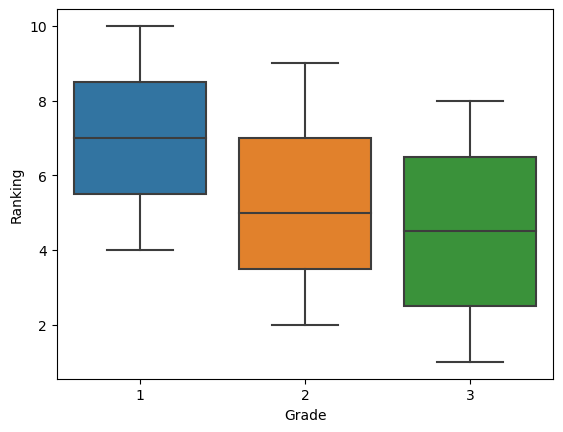

In [44]:
#7
import seaborn as sns #파이썬 모듈 중 통계 시각화 라이브러리

sns.boxplot(x='Grade',y='Ranking',data=df2)
plt.title('Distribution of Ranks for Different Grades')
plt.show()